# Neural Nets

## A practice of Neural Nets applications using numpy

### Neural Nets procedures:
1. Data preparation
2. Neural Nets application
3. Create prediction model and Gradient Descent application
4. Test prediction model and visualize outcome

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 1. Data preparation
Starting with 28x28 pixel training images (784 pixels overall). Each of these pixels is a value between 0 and 255 where 255 being completely white and 0 being completely black.

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data = np.array(data)
m, n = data.shape

# shuffle before splitting into dev and training sets
np.random.shuffle(data)

# Transpose matrix from each row being example to each column
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.


In [4]:
# Traning data
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([2, 8, 2, ..., 3, 8, 8], dtype=int64)

## 2. Neural Networks application

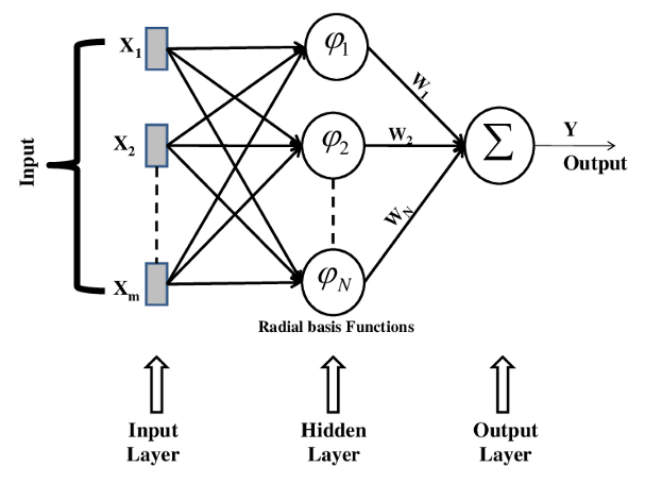
Source: https://towardsdatascience.com/a-beginners-guide-to-neural-networks-d5cf7e369a13

`The "Input Layer" will be 784 nodes representing 784 pixels mapping to a node. The "Hidden Layer" is going to have 10 units as well as the "Output Layer" corresponding to one digit that can be predicted`

In [6]:
# Initialize 
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

### Forward pass 
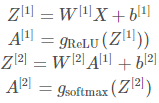

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_pass(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Backward pass
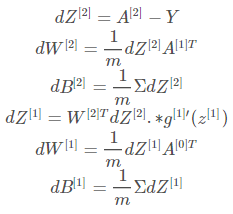

In [8]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

### Parameters update
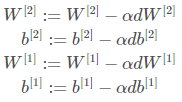

In [9]:
def parameters_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

## 3. Create predictions and apply Gradient Descent

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_pass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = parameters_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 7 7 ... 9 7 7] [2 8 2 ... 3 8 8]
0.08126829268292683
Iteration:  10
[6 2 2 ... 5 2 8] [2 8 2 ... 3 8 8]
0.16573170731707318
Iteration:  20
[6 2 2 ... 8 2 8] [2 8 2 ... 3 8 8]
0.2120731707317073
Iteration:  30
[6 2 2 ... 8 2 8] [2 8 2 ... 3 8 8]
0.29492682926829267
Iteration:  40
[6 2 2 ... 8 2 8] [2 8 2 ... 3 8 8]
0.39139024390243904
Iteration:  50
[6 2 2 ... 8 2 7] [2 8 2 ... 3 8 8]
0.46590243902439027
Iteration:  60
[6 2 2 ... 8 2 7] [2 8 2 ... 3 8 8]
0.5195121951219512
Iteration:  70
[6 2 2 ... 8 2 7] [2 8 2 ... 3 8 8]
0.5634390243902438
Iteration:  80
[6 2 2 ... 8 2 7] [2 8 2 ... 3 8 8]
0.5949756097560975
Iteration:  90
[8 2 2 ... 5 2 7] [2 8 2 ... 3 8 8]
0.6216585365853659
Iteration:  100
[8 2 2 ... 5 2 8] [2 8 2 ... 3 8 8]
0.6453414634146342
Iteration:  110
[8 6 2 ... 5 2 8] [2 8 2 ... 3 8 8]
0.6640731707317074
Iteration:  120
[8 6 2 ... 8 8 8] [2 8 2 ... 3 8 8]
0.6800975609756098
Iteration:  130
[8 6 2 ... 8 8 8] [2 8 2 ... 3 8 8]
0.6946829268292682
Iteration:  

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

## 4. Test the prediction model and visualize results

In [13]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


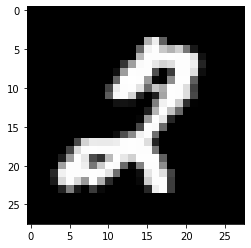

Prediction:  [8]
Label:  8


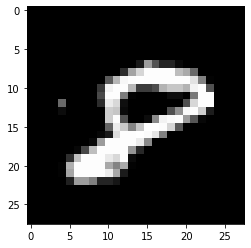

Prediction:  [2]
Label:  2


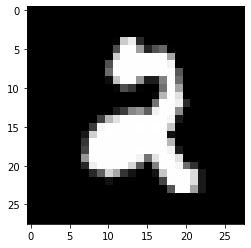

Prediction:  [6]
Label:  5


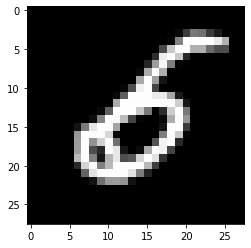

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [15]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
acc = get_accuracy(dev_predictions, Y_dev)
print("Accuracy: ", acc*100, "%")

[7 7 7 9 5 9 1 0 2 2 4 9 1 6 2 9 5 0 6 7 3 9 7 5 4 4 2 6 8 6 8 2 4 1 3 8 0
 1 8 5 3 7 6 2 2 3 1 9 1 8 5 4 6 2 2 8 8 9 5 8 1 2 8 6 5 5 1 6 5 0 0 9 6 4
 2 3 6 7 1 5 1 5 9 2 6 4 2 8 3 3 7 3 3 8 0 0 2 2 0 1 4 5 3 1 7 1 7 0 0 1 2
 9 6 8 6 5 9 4 1 1 0 5 2 4 3 7 6 8 0 1 8 8 9 6 8 6 1 5 9 1 5 7 8 9 7 8 2 1
 2 5 8 8 0 4 4 8 0 9 6 2 0 3 4 3 1 7 4 0 2 9 4 7 9 4 9 9 6 3 2 5 3 4 9 4 6
 3 8 1 7 1 6 2 5 7 0 7 0 6 3 0 7 2 9 1 0 3 2 1 3 1 1 2 1 6 7 6 5 4 8 5 9 6
 0 9 5 7 0 1 2 8 8 0 1 7 3 3 3 5 7 7 9 3 5 4 1 7 3 8 0 6 2 3 0 5 5 5 0 9 3
 1 3 0 5 2 0 9 1 1 2 3 6 2 9 3 7 3 9 8 6 8 0 5 5 4 6 0 8 4 6 5 8 8 3 4 2 8
 8 8 0 1 6 2 8 3 1 7 2 1 0 2 4 6 2 8 0 7 3 8 2 1 9 9 2 5 9 4 9 5 6 0 3 5 6
 9 0 8 3 5 5 2 2 0 9 1 8 5 5 8 6 7 0 9 9 4 1 1 6 1 7 3 3 9 8 6 9 1 0 6 2 8
 8 1 8 0 6 5 7 4 0 1 2 1 6 1 3 2 4 4 4 4 4 3 9 5 0 9 4 4 7 9 5 3 9 6 0 5 7
 6 0 7 7 6 6 3 5 6 9 6 0 5 1 3 7 6 6 9 3 2 3 0 7 8 9 6 6 6 3 4 2 6 6 4 4 8
 4 4 3 5 2 8 6 5 1 5 9 9 7 2 1 1 4 2 8 9 7 9 7 8 4 7 3 8 5 5 9 7 2 4 9 9 1
 3 1 6 8 6 5 8 4 6 3 9 2 